# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
381520,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0610,0.1172,0.0024,0,0,0,0
115346,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0024,0.0269,0,0,0,0
429386,0.6348,0.2686,0.0830,0.0391,0.0659,0.0684,0.5029,0.8960,0.1392,0.2173,8,8,19,19
131466,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0244,0.0659,0.0024,0.0269,0,0,0,0
158946,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.5273,0.1172,0.0024,0.0464,0,9,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras.utils.np_utils import to_categorical
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()

In [13]:
sc = pd.DataFrame(MinMaxScaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,0.014154,0.000515,0.0,0.000515,0.0,0.006602,0.0,0.009950,0.000515,0.007520
1,0.012052,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.008385,0.000515,0.006361
2,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.007870,0.000515,0.005203
3,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.006819,0.000515,0.003476
4,0.009950,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.007334,0.000515,0.002885
...,...,...,...,...,...,...,...,...,...,...
378530,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.011537,0.026198,0.000000
378531,0.000000,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.010487,0.027250,0.000000
378532,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.010487,0.027250,0.000000
378533,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.009950,0.027765,0.000000


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

# 1. Define Network

In [20]:
num_classes = 24
n_inputs = X.shape[1]

In [34]:
# define encoder
visible = Input(shape=(n_inputs,))


# encoder level 1
e = Dense(n_inputs*2, activation = 'relu')(visible)




# encoder level 2
e = Dense(n_inputs, activation = 'softmax')(e)




# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)



# define decoder, level 1
d = Dense(n_inputs, activation ='softmax')(bottleneck)



# decoder level 2
d = Dense(n_inputs*2, activation = 'relu')(d)






# output layer
output = Dense(n_inputs, activation='softmax')(d)



In [35]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# 2. Compile Network

In [36]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

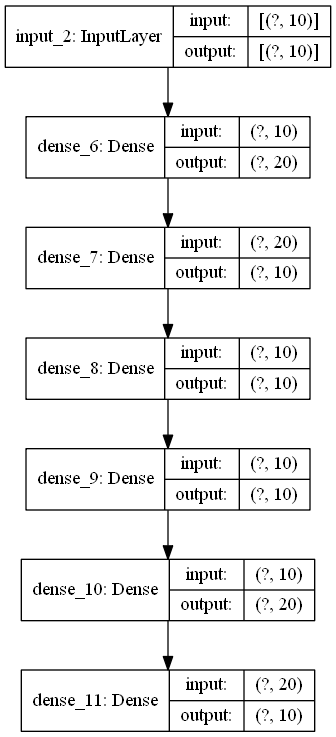

In [37]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [38]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

# 3. Fit Network

In [39]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=64, validation_data=(X_test,X_test))

Epoch 1/50
4732/4732 [==============================] - 7s 1ms/step - loss: 0.0082 - accuracy: 0.6120 - val_loss: 0.0078 - val_accuracy: 0.6557
Epoch 2/50
4732/4732 [==============================] - 6s 1ms/step - loss: 0.0076 - accuracy: 0.7256 - val_loss: 0.0075 - val_accuracy: 0.7690
Epoch 3/50
4732/4732 [==============================] - 6s 1ms/step - loss: 0.0075 - accuracy: 0.7757 - val_loss: 0.0075 - val_accuracy: 0.7451
Epoch 4/50
4732/4732 [==============================] - 8s 2ms/step - loss: 0.0074 - accuracy: 0.8115 - val_loss: 0.0074 - val_accuracy: 0.8140
Epoch 5/50
4732/4732 [==============================] - 6s 1ms/step - loss: 0.0073 - accuracy: 0.8347 - val_loss: 0.0074 - val_accuracy: 0.7697
Epoch 6/50
4732/4732 [==============================] - 6s 1ms/step - loss: 0.0073 - accuracy: 0.8481 - val_loss: 0.0073 - val_accuracy: 0.8710
Epoch 7/50
4732/4732 [==============================] - 6s 1ms/step - loss: 0.0073 - accuracy: 0.8638 - val_loss: 0.0073 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

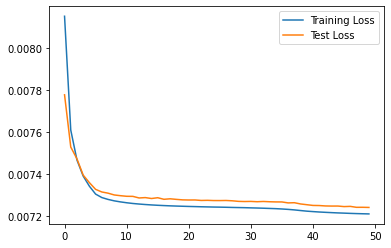

In [40]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

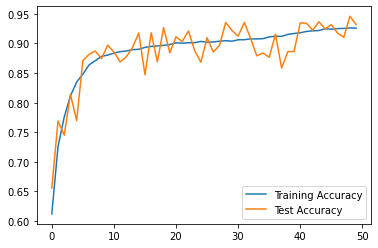

In [41]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)

ValueError: in user code:

    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1176 test_step
        self.compiled_loss(
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1195 mean_squared_error
        return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10397 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3477 _create_op_internal
        ret = Operation(
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\nafem\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 10 and 24 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](functional_3/dense_11/Softmax, IteratorGetNext:1)' with input shapes: [?,10], [?,24].


##  4.3 Make Predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions